<a href="https://colab.research.google.com/github/prateekdesai04/MNIST-Classification/blob/main/MNIST_CNN_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Flatten 
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
import random


In [ ]:
np.random.seed(0)

In [ ]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


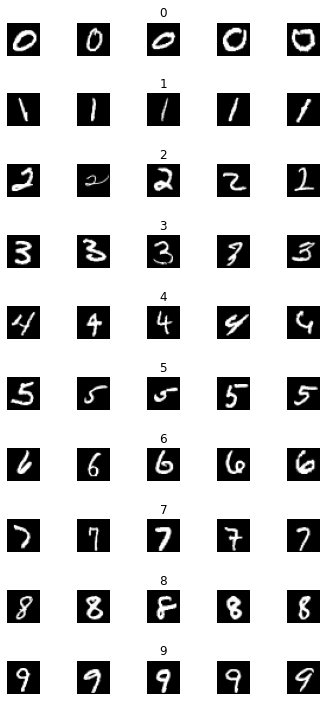

In [ ]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


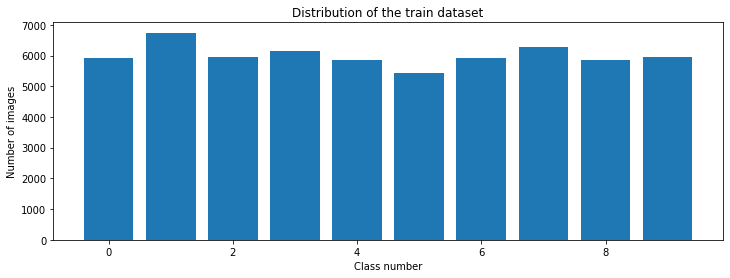

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()
 


X_train = X_train.reshape(60000, 28, 28, 1) # not passing each pixel like previous neural network
X_test = X_test.reshape(10000, 28, 28, 1)


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [ ]:
#define LeNet model function
def leNet_model():
  model = Sequential()
  model.add(Convolution2D(30, (5, 5), input_shape = (28, 28, 1), activation = "relu")) # 5,5 is the filter tuple size and is a hyperparameter stride def = 1 and padding def = valid
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Convolution2D(15, (3, 3), activation = "relu")) # because more dense input - less filters but higher parameters 
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation = "relu"))
  model.add(Dropout(0.5)) # 50% nodes are dropped
  model.add(Dense(num_classes, activation = "softmax"))
  model.compile(Adam(lr = 0.01), loss = "categorical_crossentropy", metrics = ["accuracy"])
  return model


In [ ]:
model = leNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               188000    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

In [ ]:
history = model.fit(x = X_train, y = y_train, epochs = 10, validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 1s 9ms/step - loss: 0.2319 - accuracy: 0.9253 - val_loss: 0.0499 - val_accuracy: 0.9843
Epoch 2/10
135/135 [==============================] - 1s 8ms/step - loss: 0.0730 - accuracy: 0.9780 - val_loss: 0.0406 - val_accuracy: 0.9882
Epoch 3/10
135/135 [==============================] - 1s 8ms/step - loss: 0.0555 - accuracy: 0.9831 - val_loss: 0.0434 - val_accuracy: 0.9880
Epoch 4/10
135/135 [==============================] - 1s 8ms/step - loss: 0.0498 - accuracy: 0.9840 - val_loss: 0.0441 - val_accuracy: 0.9890
Epoch 5/10
135/135 [==============================] - 1s 8ms/step - loss: 0.0476 - accuracy: 0.9855 - val_loss: 0.0379 - val_accuracy: 0.9888
Epoch 6/10
135/135 [==============================] - 1s 8ms/step - loss: 0.0454 - accuracy: 0.9858 - val_loss: 0.0380 - val_accuracy: 0.9905
Epoch 7/10
135/135 [==============================] - 1s 8ms/step - loss: 0.0383 - accuracy: 0.9885 - val_loss: 0.0440 - val_accuracy: 0.9898
Epoch 

Text(0.5, 0, 'epoch')

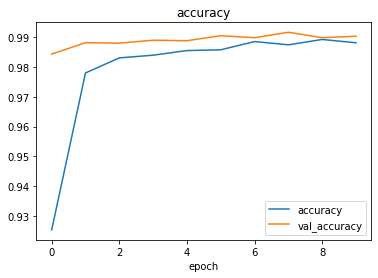

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy", "val_accuracy"])
plt.title("accuracy")
plt.xlabel("epoch")

Text(0.5, 0, 'epoch')

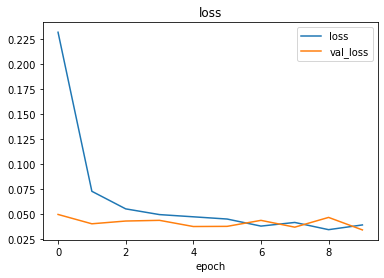

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss", "val_loss"])
plt.title("loss")
plt.xlabel("epoch")

<Response [200]>


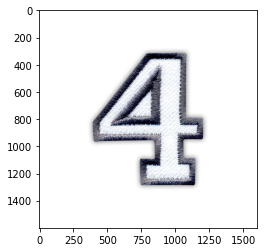

In [ ]:
import requests
from PIL import Image
#url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
url = "https://patchion.com/1723/the-digit-4-white.jpg"
response = requests.get(url, stream = True) # so the reqiest doesn' wait for image to be downloaded completely
print(response)
img = Image.open(response.raw) # identify raw content of the image
plt.imshow(img, cmap = plt.get_cmap("gray"))

(1600, 1600, 3)


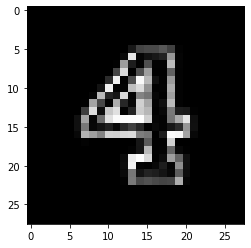

In [ ]:
import cv2
img_array = np.asarray(img)
print(img_array.shape) # depth of 3 RGB 
resized = cv2.resize(img_array, (28, 28)) # our network was trained on 28 x 28 grayscale images
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
#print(gray_scale.shape)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap = plt.get_cmap("gray")) # if bitwise not is not performed then this will give an image of white back. and black digit


In [ ]:
image = image/255
image = image.reshape(1, 28, 28, 1)

In [ ]:
prediction = model.predict_classes(image)
print("Predicted digit : ",str(prediction))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Predicted digit :  [4]


In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.03330440819263458
Test accuracy: 0.989300012588501


In [ ]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
 
visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
 
print(visual_layer1.shape)
print(visual_layer2.shape)


(1, 24, 24, 30)
(1, 10, 10, 15)


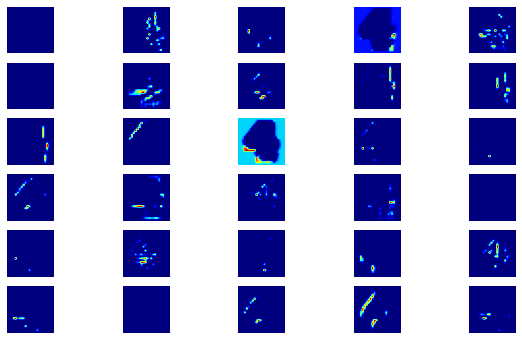

In [ ]:
plt.figure(figsize = (10, 6))
for i in range(30):
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap = plt.get_cmap('jet'))
  plt.axis("off")

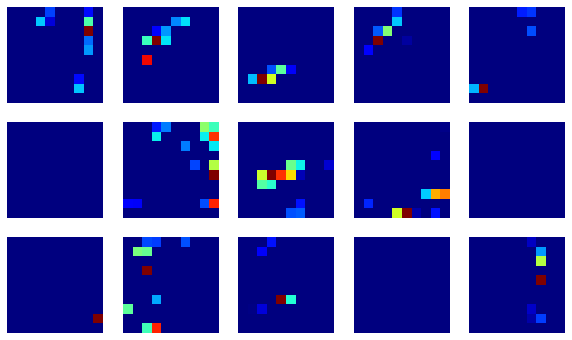

In [ ]:
plt.figure(figsize = (10, 6))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap = plt.get_cmap('jet'))
  plt.axis("off")